<a href="https://colab.research.google.com/github/Akhilauggina/ml_pro/blob/main/movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np



In [52]:
data=pd.read_csv('/content/movie-data.csv')

In [53]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [54]:
data.shape

(1000, 12)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [56]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [57]:
data.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


In [58]:
data=data.drop(columns=['Title','Description','Actors','Director'])

In [59]:
data

,Rank,Genre,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,"Action,Adventure,Sci-Fi",2014,121,8.1,757074,333.13,76.0
1,2,"Adventure,Mystery,Sci-Fi",2012,124,7.0,485820,126.46,65.0
2,3,"Horror,Thriller",2016,117,7.3,157606,138.12,62.0
3,4,"Animation,Comedy,Family",2016,108,7.2,60545,270.32,59.0
4,5,"Action,Adventure,Fantasy",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...
995,996,"Crime,Drama,Mystery",2015,111,6.2,27585,NaN,45.0
996,997,Horror,2007,94,5.5,73152,17.54,46.0
997,998,"Drama,Music,Romance",2008,98,6.2,70699,58.01,50.0
998,999,"Adventure,Comedy",2014,93,5.6,4881,NaN,22.0


In [64]:
data['Revenue (Millions)']=data['Revenue (Millions)'].fillna(data['Revenue (Millions)'].mean())

In [65]:
data['Metascore']=data['Metascore'].fillna(data['Metascore'].median())

In [70]:
data['label']=data['Rating'].apply(lambda x:1 if x>=7 else 0)

In [40]:
data['label']

,label
0,1
1,1
2,1
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [71]:
features=['Runtime (Minutes)','Votes','Revenue (Millions)','Metascore']
x=data[features]
y=data['label']

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

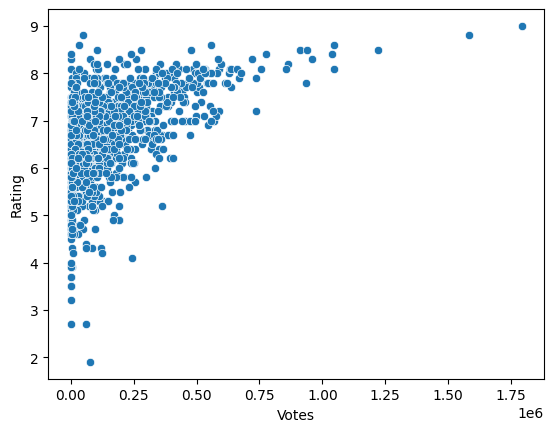

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=data['Votes'],y=data['Rating'])
plt.show()

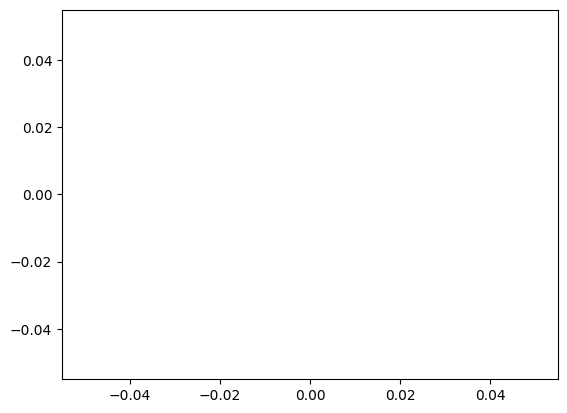

In [44]:
sns.scatterplot(x=data['Revenue (Millions)'], y=data['Rating'])
plt.show()


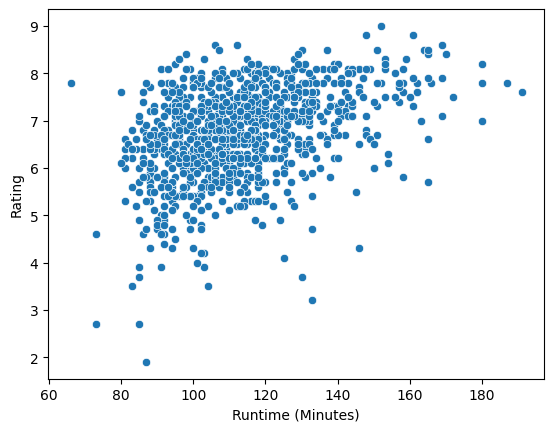

In [45]:
sns.scatterplot(x=data['Runtime (Minutes)'], y=data['Rating'])
plt.show()


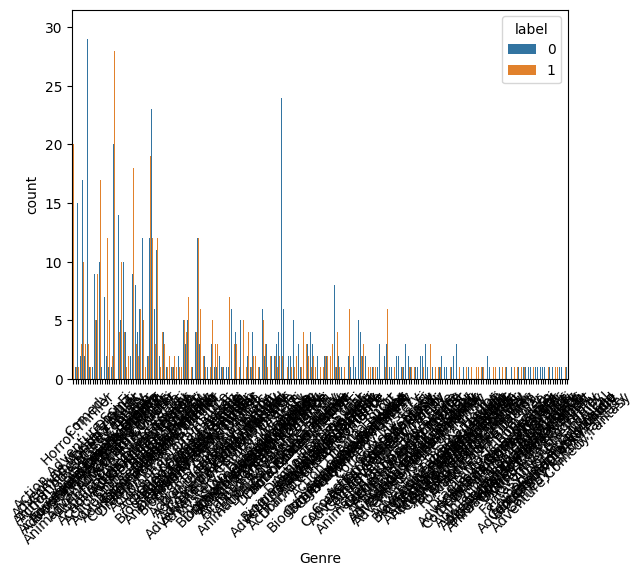

In [46]:
sns.countplot(x=data['Genre'], hue=data['label'])
plt.xticks(rotation=45)
plt.show()


In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [76]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy',accuracy)

Accuracy 0.845


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       113
           1       0.81      0.84      0.82        87

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.84      0.85       200

